In [1]:
import pandas as pd
import geopandas as gpd
import requests

In [2]:
geodata_url = "https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2017_gegeneraliseerd&outputFormat=json"
gemeentegrenzen = gpd.read_file(geodata_url)

In [5]:
data = pd.read_csv('Data/Combi_df_klein.csv')

In [7]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Date_of_report', 'Municipality_code',
       'Municipality_name', 'Province', 'Total_reported', 'Hospital_admission',
       'Deceased', 'Title', 'Totale bevolking', 'Mannen', 'Vrouwen',
       'Jonger dan 5 jaar.1', '5 tot 10 jaar.1', '10 tot 15 jaar.1',
       '15 tot 20 jaar.1', '20 tot 25 jaar.1', '25 tot 45 jaar.1',
       '45 tot 65 jaar.1', '65 tot 80 jaar.1', '80 jaar of ouder.1',
       'Nederlandse achtergrond.1', 'Totaal met migratieachtergrond.1',
       'Westerse migratieachtergrond.1',
       'Totaal niet-westerse migratieachtergrond.1', 'Marokko.1',
       '(voormalige) Nederlandse Antillen, Aruba.1', 'Suriname.1', 'Turkije.1',
       'Overig niet-westerse migratieachtergrond.1', 'Sterfte',
       'Sterfte, relatief', 'Bevolkingsdichtheid', 'Woningdichtheid',
       'Koopwoningen', 'Huurwoningen'],
      dtype='object')

In [11]:
data['Deceased_per_inhabitant'] = data['Deceased']/data['Totale bevolking']

In [9]:
data

,Unnamed: 0,Unnamed: 0.1,Date_of_report,Municipality_code,Municipality_name,Province,Total_reported,Hospital_admission,Deceased,Title,...,Suriname.1,Turkije.1,Overig niet-westerse migratieachtergrond.1,Sterfte,"Sterfte, relatief",Bevolkingsdichtheid,Woningdichtheid,Koopwoningen,Huurwoningen,Deceased per inhabitant
0,0,221848,2021-11-10 10:00:00,GM0014,Groningen,Groningen,22852,119,50,GM0014,...,1.5,0.8,7.7,1805.0,7.7,1255.0,627.0,41.2,58.1,0.000215
1,1,221849,2021-11-10 10:00:00,GM0034,Almere,Flevoland,27178,392,113,GM0034,...,11.5,2.0,12.8,1084.0,5.1,1640.0,666.0,63.9,35.9,0.000533
2,2,221850,2021-11-10 10:00:00,GM0037,Stadskanaal,Groningen,3052,31,21,GM0037,...,0.4,0.1,2.4,440.0,13.9,269.0,130.0,59.5,39.3,0.000663
3,3,221851,2021-11-10 10:00:00,GM0047,Veendam,Groningen,2383,13,11,GM0047,...,1.0,3.1,2.8,310.0,11.3,360.0,169.0,65.0,34.8,0.000402
4,4,221852,2021-11-10 10:00:00,GM0050,Zeewolde,Flevoland,2323,22,14,GM0050,...,0.7,0.4,3.7,115.0,5.1,92.0,35.0,70.5,29.4,0.000618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,346,222194,2021-11-10 10:00:00,GM1963,Hoeksche Waard,Zuid-Holland,11491,165,68,GM1963,...,0.6,0.2,2.8,858.0,9.8,325.0,141.0,70.2,29.6,0.000778
347,347,222195,2021-11-10 10:00:00,GM1966,Het Hogeland,Groningen,4959,40,20,GM1966,...,0.3,0.1,2.5,495.0,10.4,99.0,47.0,67.0,32.8,0.000418
348,348,222196,2021-11-10 10:00:00,GM1969,Westerkwartier,Groningen,4889,39,26,GM1969,...,0.3,0.1,2.3,592.0,9.3,175.0,75.0,71.7,28.0,0.000411
349,349,222197,2021-11-10 10:00:00,GM1970,Noardeast-Fryslân,Fryslân,5297,69,42,GM1970,...,0.2,0.0,2.1,485.0,10.7,120.0,55.0,66.4,33.0,0.000929


In [14]:
gemeentegrenzen_data = pd.merge(gemeentegrenzen,data,how='left',left_on='statcode',right_on='Municipality_code')

<AxesSubplot:>

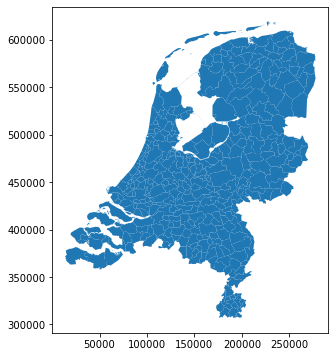

In [17]:
gemeentegrenzen_data.plot(figsize = (12,6))

<AxesSubplot:>

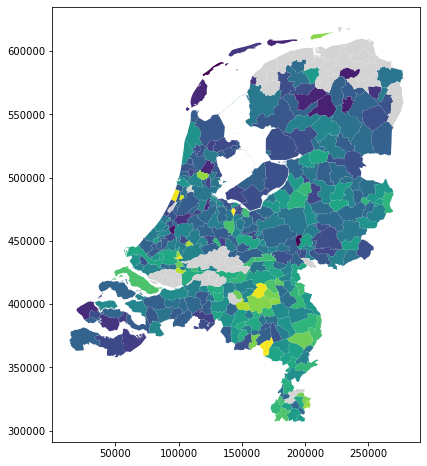

In [20]:
gemeentegrenzen_data.plot(column = 'Deceased_per_inhabitant', figsize = (16,8),missing_kwds = dict(color = "lightgrey",))